## Author : Basa Sai Ram

### Exploraqtory Data Analysis on PUBG

#### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

__Convert CSV to Pandas__

In [2]:
pubg=pd.read_csv("E:\\innomatics\\Class\\PUBGDATA.csv")

In [3]:
pubg.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


__Check NULL Values__

In [ ]:
pubg.info()

__Categorical and Numerical Values__

In [5]:
pubg.select_dtypes(include="object").columns

Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object')

In [6]:
pubg.select_dtypes(include="number").columns

Index(['Unnamed: 0', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc'],
      dtype='object')

### Assists:
* In pubg assists(help) means if you have given half of the damage to your enemy and your team-mate kills the same enemy as you have done some damage on it then it is counted as Assist Kill .It has two faces like coin one side to help the teammate to kill the opponent enemy as another side is steal the kill point

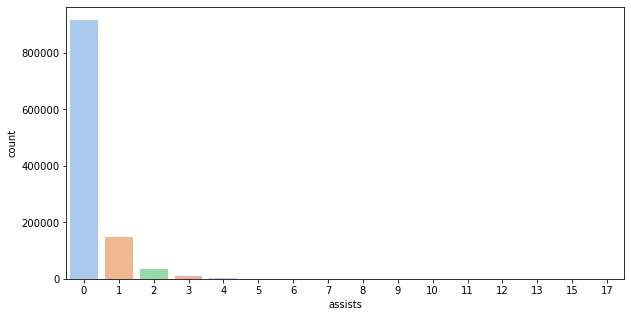

Only 17.51 % are trying to assit their team_mate to kill enemy or stealing assist kill point


In [7]:
plt.figure(figsize=(10,5))
sns.countplot(pubg["assists"],palette='pastel')
plt.show()
assist=round((len(pubg[pubg["assists"]>0])/len(pubg["assists"]))*100,2)
print(f"Only {assist} % are trying to assit their team_mate to kill enemy or stealing assist kill point")

### Boosts:
* Boosts is used to increase the Health percenatage after the healing and boost is used at peak time.If player is using the the boosts like Energy Drink, Painkillers,Adrenaline Syringe it increases the health to 100% it can help player to survive.If player Health percentage is  75% use Energy Drink  otherwise player is wasting the boosts element.

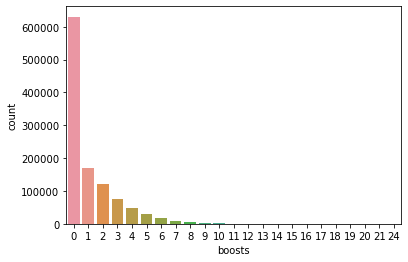

43.3% of players are using boost after the healing at peak times to battle


In [8]:
sns.countplot(pubg["boosts"])
plt.show()
boosts=round((len(pubg[pubg["boosts"]>0])/len(pubg["boosts"]))*100,2)
print(f"{boosts}% of players are using boost after the healing at peak times to battle")

### Damagedealt :
* Damagedealt means how much player is damaging  enemy to kill/knock down.In solo it is called kill and in squad or duomode called knocked down,more damage gives more kills.

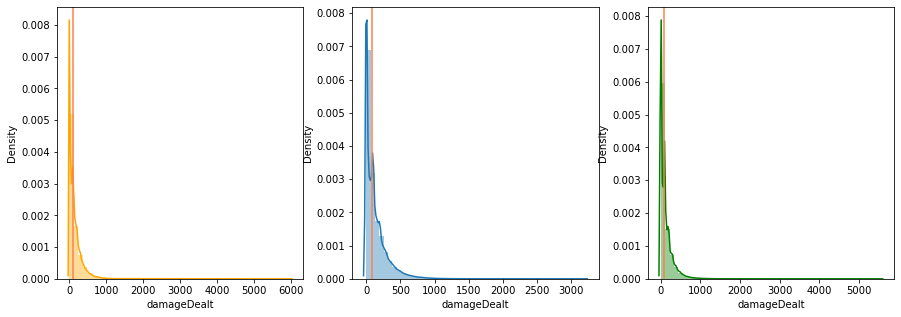

In Squad mode to get 1 kill, player has to give  86.84  damage to enemy 
In duo mode to get 1 kill, player has to give  84.83500000000001  damage to enemy 
In solo mode to get 1 kill, player has to give  74.205  damage to enemy 


In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
Squad=pubg[(pubg["matchType"]=="squad")|(pubg["matchType"]=="normal-squad-fpp")|(pubg["matchType"]=="normal-squad")|(pubg["matchType"]=="squad-fpp")]
sns.distplot(Squad["damageDealt"],color="orange")
plt.axvline(Squad["damageDealt"].median(), color='coral', label='Median')
squad_avg_damage=Squad["damageDealt"].median()

plt.subplot(1,3,2)
duo=pubg[(pubg["matchType"]=="duo")|(pubg["matchType"]=="normal-duo-fpp")|(pubg["matchType"]=="duo-squad")|(pubg["matchType"]=="duo-fpp")]
sns.distplot(duo["damageDealt"])
plt.axvline(duo["damageDealt"].median(), color='coral', label='Median')
duo_avg_damage=duo["damageDealt"].median()

plt.subplot(1,3,3)
solo=pubg[(pubg["matchType"]=="solo")|(pubg["matchType"]=="normal-solo-fpp")|(pubg["matchType"]=="solo-squad")|(pubg["matchType"]=="solo-fpp")]
sns.distplot(solo["damageDealt"],color="green")
plt.axvline(solo["damageDealt"].median(), color='coral', label='Median')
solo_avg_damage=solo["damageDealt"].median()

plt.show()

print(f"In Squad mode to get 1 kill, player has to give  {squad_avg_damage}  damage to enemy ")
print(f"In duo mode to get 1 kill, player has to give  {duo_avg_damage}  damage to enemy ")
print(f"In solo mode to get 1 kill, player has to give  {solo_avg_damage}  damage to enemy ")

### Down But Not Out:
* In this case player gets damage by enemy but player couldnt get killed in duo or squad mode player can be surive if he get healed by team-mates , when in solo mode  player is died.This happens when player gets more damage and Health percentage is zero.

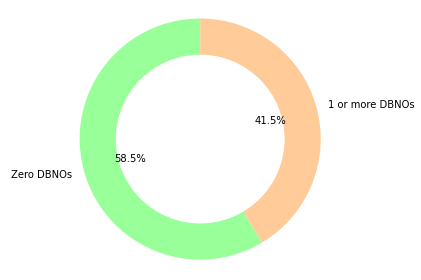

41.5% are faced Down But Not Outs while damaging the enemy 


In [10]:
labels = ['Zero DBNOs','1 or more DBNOs']
Duo_DBNOs=list(pubg.value_counts(duo["DBNOs"]>0))
fig1, ax1 = plt.subplots()
ax1.pie(Duo_DBNOs, labels=labels, autopct='%1.1f%%', startangle=90,colors = ['#99ff99','#ffcc99'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("41.5% are faced Down But Not Outs while damaging the enemy ")

In [12]:
squad_DBNOs=list(pubg.value_counts(Squad["DBNOs"]>0))

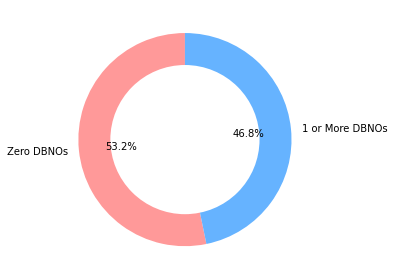

46.8% are faced Down But Not Outs while damaging the enemy


In [13]:
labels=["Zero DBNOs","1 or More DBNOs"]
fig1,squad= plt.subplots()
squad.pie(squad_DBNOs,labels=labels, autopct='%1.1f%%', startangle=90,colors = ['#ff9999','#66b3ff'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("46.8% are faced Down But Not Outs while damaging the enemy")

__DBNOs vs DamageDealt__

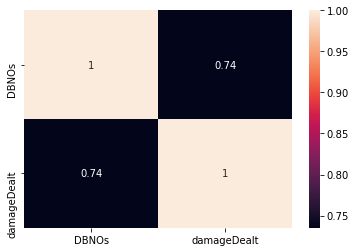

There are 74% of chances of getting damage to the player while players tries to damage enemy  


In [14]:
sns.heatmap(pubg[["DBNOs","damageDealt"]].corr(),annot=True)
plt.show()
print("There are 74% of chances of getting damage to the player while players tries to damage enemy  ")

### Headshots
* Enemies head shoots  by a opponent player during the Battle

In [15]:
headshots=pubg.value_counts(pubg.headshotKills>0)

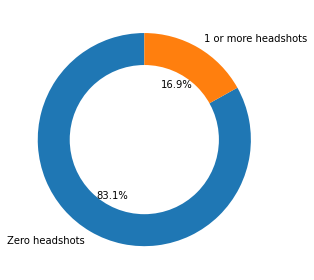

The percentage of Zero headshots is very high says that its very difficut to shoot at head


In [16]:
labels=["Zero headshots","1 or more headshots"]
fig1,pubg_headshots= plt.subplots()
pubg_headshots.pie(headshots,labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("The percentage of Zero headshots is very high says that its very difficut to shoot at head")

### Heals:
* Heals means cure during the battle the players get damage so to heal player will use first aid kit.This could happen if player get more damage leads to decrease Health Percentage to survive player use kit which increases health percentage

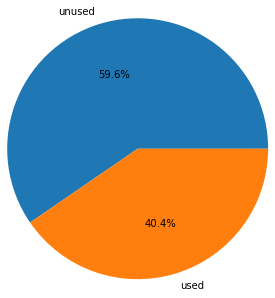

40.4% of player used the firstAid kit to heals and increase HP


In [17]:
player_heals=list(pubg.value_counts(pubg["heals"]>0))
plt.pie(player_heals,labels=["unused","used"],autopct='%1.1f%%',radius=1.5)
plt.show()
print("40.4% of player used the firstAid kit to heals and increase HP")

### Kills
* Enemies killed by a player during the battle

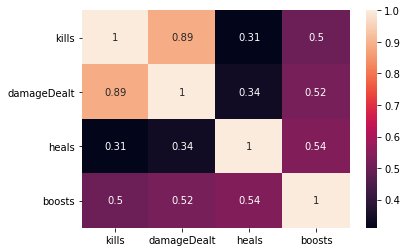

There are 89% of chances to get killed after getting damage 
There are 54% of players are used boosts to increase the 100% health percentage at peak times


In [18]:
sns.heatmap(pubg[["kills","damageDealt","heals","boosts"]].corr(),annot=True)
plt.show()
print("There are 89% of chances to get killed after getting damage ")
print("There are 54% of players are used boosts to increase the 100% health percentage at peak times")

### MatchDuration:
* Time taken by the groups to complete the match.

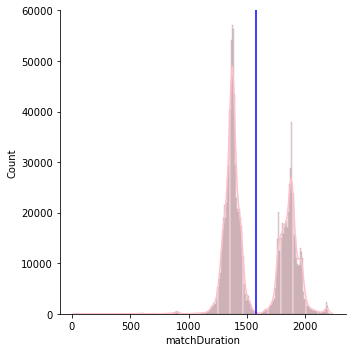

Average time  taken by groups to complete the match is : 1579.347832500706 seconds


In [20]:
sns.displot(pubg["matchDuration"],kde=True,color="pink")
plt.axvline(pubg["matchDuration"].mean(), color='blue', label='Median')
avg_matchduration=pubg["matchDuration"].mean()
plt.show()
print(f"Average time  taken by groups to complete the match is : {avg_matchduration} seconds")

### Revive:
* Player is revived by team_mates when he is damaged by friendly fire or enemy

In [22]:
revive=pubg.value_counts(pubg["revives"]>0)

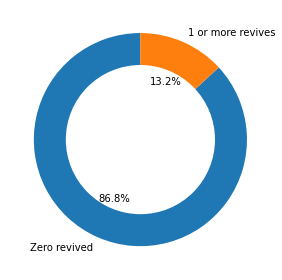

The 13.2% players are get revived by their team-mates


In [23]:
labels=["Zero revived","1 or more revives"]
fig1,player_revives= plt.subplots()
player_revives.pie(revive,labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("The 13.2% players are get revived by their team-mates")

### Mode of Match:

In [30]:
mode_0f_match=pd.DataFrame({"matchType":["solo","duo","Squad"],"players":[len(solo),len(duo),len(Squad)]})

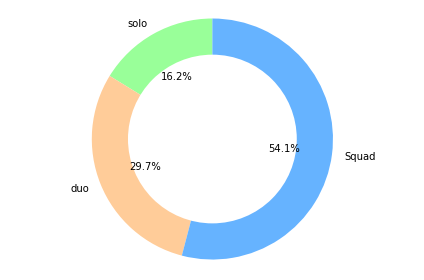

54.1% are like to play in the squad mode comapre to Duo and Solo


In [32]:
fig1, ax1 = plt.subplots()
ax1.pie(mode_0f_match["players"], labels=mode_0f_match["matchType"], autopct='%1.1f%%', startangle=90,colors = ['#99ff99','#ffcc99','#66b3ff'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("54.1% are like to play in the squad mode comapre to Duo and Solo")